In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Text Cleaning and Preprocessing
class TextPreprocessor:
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def transform(self, text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization and lemmatization
        tokens = [self.lemmatizer.lemmatize(word) for word in text.split() if word not in self.stopwords]
        return ' '.join(tokens)

# Load the dataset
data = pd.read_csv('/content/SAH-labeled-dataset-July-20-9-cls.csv')  # Update with your dataset file name

# Drop rows with missing values in the 'description' and 'Counterspeech' columns
data.dropna(subset=['description', 'consequences'], inplace=True)

# Split the dataset into training and testing sets
text_train, text_test, counterspeech_train, counterspeech_test = train_test_split(
    data['description'],
    data['consequences'],
    test_size=0.2,
    random_state=42
)

# Text Cleaning and Preprocessing
preprocessor = TextPreprocessor()
cleaned_text_train = [preprocessor.transform(text) for text in text_train]
cleaned_text_test = [preprocessor.transform(text) for text in text_test]

# Word Embedding using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(cleaned_text_train)
features_test = vectorizer.transform(cleaned_text_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train, counterspeech_train)

# Predictions
predictions = rf_classifier.predict(features_test)

# Evaluation
print(classification_report(counterspeech_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       247
         1.0       0.74      0.60      0.66       124

    accuracy                           0.80       371
   macro avg       0.78      0.75      0.76       371
weighted avg       0.79      0.80      0.79       371



Saving the ML model

In [27]:
import joblib

# Save the trained BRF model to a file
model_filename = 'rf_classifier.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Trained RF model saved as '{model_filename}'")

Trained RF model saved as 'rf_classifier.joblib'


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import re


# Evaluation
print('Classification Report:')
print(classification_report(counterspeech_test, predictions))

print('Confusion Matrix:')
print(confusion_matrix(counterspeech_test, predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       247
         1.0       0.74      0.60      0.66       124

    accuracy                           0.80       371
   macro avg       0.78      0.75      0.76       371
weighted avg       0.79      0.80      0.79       371

Confusion Matrix:
[[220  27]
 [ 49  75]]


In [32]:
#Adding other models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(features_train, counterspeech_train)
nb_predictions = nb_classifier.predict(features_test)

print("Naive Bayes Classifier:")
print(classification_report(counterspeech_test, nb_predictions))
print()

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(features_train, counterspeech_train)
svm_predictions = svm_classifier.predict(features_test)

print("Support Vector Machine (SVM) Classifier:")
print(classification_report(counterspeech_test, svm_predictions))
print()

# Neural Network (Multi-Layer Perceptron) Classifier using Keras
from keras.models import Sequential
from keras.layers import Dense

# Convert target labels to one-hot encoding
num_classes = len(np.unique(counterspeech_train))
counterspeech_train_encoded = np.eye(num_classes)[counterspeech_train]
counterspeech_test_encoded = np.eye(num_classes)[counterspeech_test]

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))
nn_model.add(Dense(num_classes, activation='softmax'))
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(features_train, counterspeech_train_encoded, epochs=10, batch_size=32, verbose=1)

# Predictions
nn_predictions = np.argmax(nn_model.predict(features_test), axis=-1)

print("Neural Network (Multi-Layer Perceptron) Classifier:")
print(classification_report(counterspeech_test, nn_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       247
         1.0       0.76      0.66      0.71       124

    accuracy                           0.82       371
   macro avg       0.80      0.78      0.79       371
weighted avg       0.81      0.82      0.81       371


Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       247
         1.0       0.78      0.65      0.71       124

    accuracy                           0.82       371
   macro avg       0.81      0.78      0.79       371
weighted avg       0.82      0.82      0.82       371




IndexError: ignored

Running Confusion Matrix on all the models

Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       247
         1.0       0.78      0.67      0.72       124

    accuracy                           0.82       371
   macro avg       0.81      0.79      0.80       371
weighted avg       0.82      0.82      0.82       371

Confusion Matrix:
[[223  24]
 [ 41  83]]


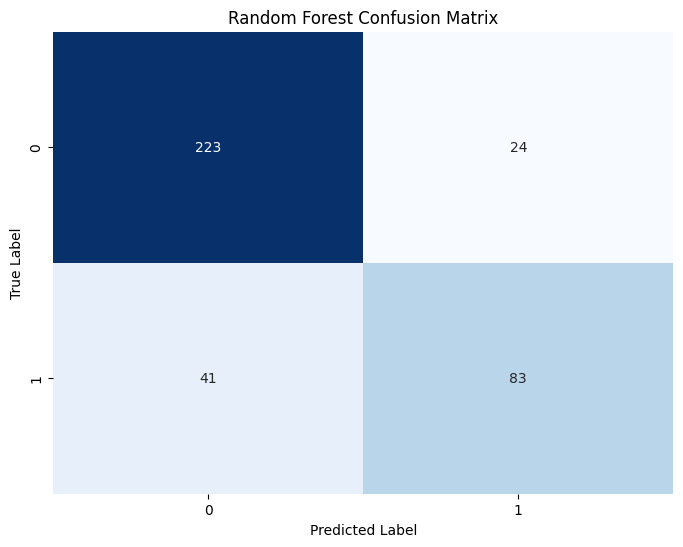

Trained BRF model saved as 'brf_classifier.joblib'
Naive Bayes Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       247
         1.0       0.76      0.66      0.71       124

    accuracy                           0.82       371
   macro avg       0.80      0.78      0.79       371
weighted avg       0.81      0.82      0.81       371

Confusion Matrix:
[[221  26]
 [ 42  82]]


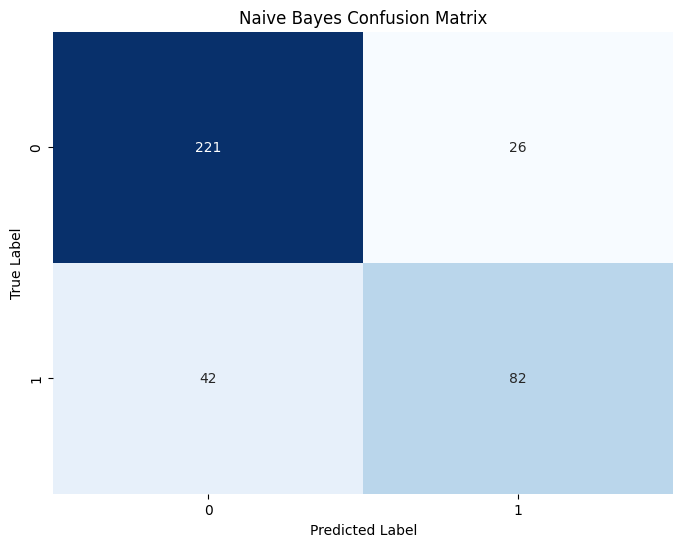

Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       247
         1.0       0.78      0.65      0.71       124

    accuracy                           0.82       371
   macro avg       0.81      0.78      0.79       371
weighted avg       0.82      0.82      0.82       371

Confusion Matrix:
[[225  22]
 [ 44  80]]


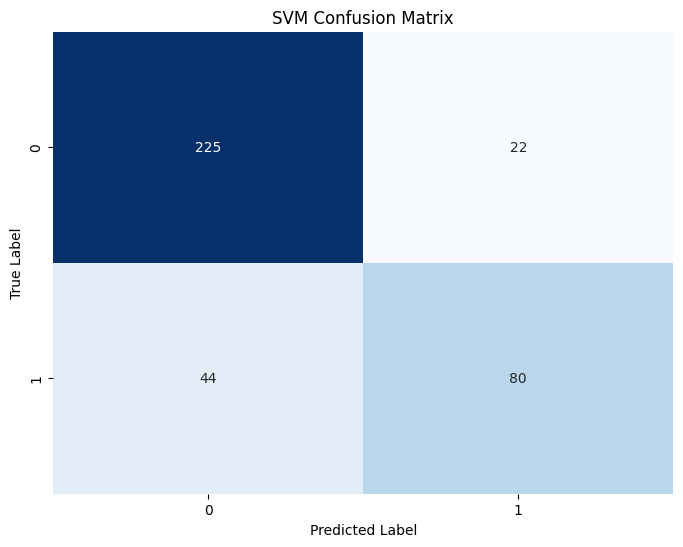

12/12 [==============================] - 0s 1ms/step
Neural Network (Multi-Layer Perceptron) Classifier:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       247
         1.0       0.50      0.01      0.02       124

    accuracy                           0.67       371
   macro avg       0.58      0.50      0.41       371
weighted avg       0.61      0.67      0.54       371

Confusion Matrix:
[[246   1]
 [123   1]]


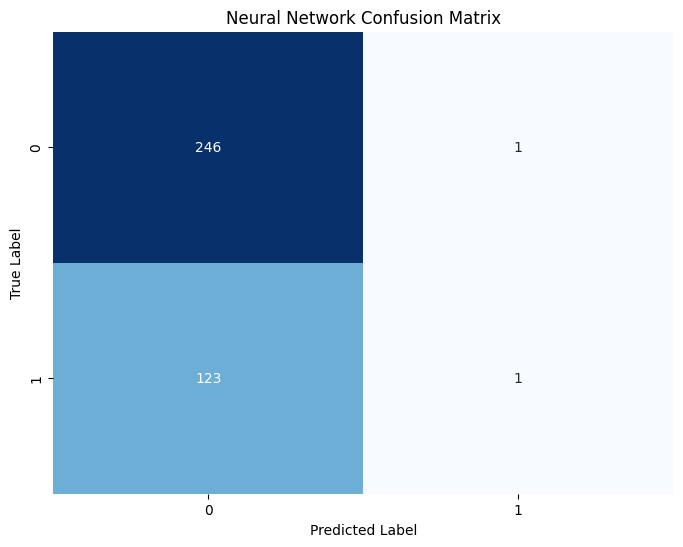

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train, counterspeech_train)
rf_predictions = rf_classifier.predict(features_test)

print("Random Forest Classifier:")
print(classification_report(counterspeech_test, rf_predictions))
print("Confusion Matrix:")
rf_cm = confusion_matrix(counterspeech_test, rf_predictions)
print(rf_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(features_train, counterspeech_train)
nb_predictions = nb_classifier.predict(features_test)

print("Naive Bayes Classifier:")
print(classification_report(counterspeech_test, nb_predictions))
print("Confusion Matrix:")
nb_cm = confusion_matrix(counterspeech_test, nb_predictions)
print(nb_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(features_train, counterspeech_train)
svm_predictions = svm_classifier.predict(features_test)

print("Support Vector Machine (SVM) Classifier:")
print(classification_report(counterspeech_test, svm_predictions))
print("Confusion Matrix:")
svm_cm = confusion_matrix(counterspeech_test, svm_predictions)
print(svm_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Neural Network (Multi-Layer Perceptron) Classifier using Keras
nn_predictions = np.argmax(nn_model.predict(features_test), axis=-1)

print("Neural Network (Multi-Layer Perceptron) Classifier:")
print(classification_report(counterspeech_test, nn_predictions))
print("Confusion Matrix:")
nn_cm = confusion_matrix(counterspeech_test, nn_predictions)
print(nn_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Improving the performance of the model.
1# Hyperparameter tuning. (Found no change)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       247
         1.0       0.73      0.66      0.69       124

    accuracy                           0.80       371
   macro avg       0.78      0.77      0.77       371
weighted avg       0.80      0.80      0.80       371

Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       247
         1.0       0.78      0.67      0.72       124

    accuracy                           0.82       371
   macro avg       0.81      0.79      0.80       371
weighted avg       0.82      0.82      0.82       371

Confusion Matrix:
[[223  24]
 [ 41  83]]


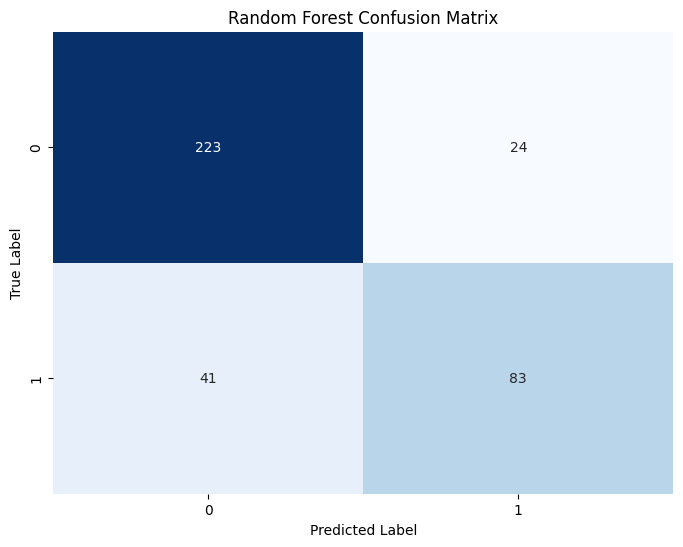

In [37]:
#Hyperparameter tuning in RF model
from sklearn.model_selection import train_test_split, GridSearchCV
# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(features_train, counterspeech_train)

best_rf_classifier = grid_search.best_estimator_

# Predictions
predictions = best_rf_classifier.predict(features_test)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print(classification_report(counterspeech_test, predictions))

print("Random Forest Classifier:")
print(classification_report(counterspeech_test, rf_predictions))
print("Confusion Matrix:")
rf_cm = confusion_matrix(counterspeech_test, rf_predictions)
print(rf_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Saving the RF model

In [44]:
import joblib

# Save the trained RF model to a file
model_filename = 'rf_consequences.joblib'
joblib.dump(best_rf_classifier, model_filename)
print(f"Trained RF model saved as '{model_filename}'")

Trained RF model saved as 'rf_consequences.joblib'
